### Stock price prediction

In this project, I use classifying algorithms to predict whether the price of a given asset will move upwards on downwards on a given day, given historical data up to the previous day. My ticker choice is `CSU.TO`, representing a Canadian company by the name of Constellation Software. It is one of the very few individual indices representing a single company that I actively invest in, given its stellar historic behaviour.

I will start by importing some relevant libraries

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The `csu.csv` file contains data for a period of 5 years, up until May 9th, 2025. Let us create the Pandas Dataframe `csu`. 

In [284]:
csu = pd.read_csv('csu.csv')

We display a preview of this dataframe

In [285]:
csu.head()

,Close,High,Low,Open,Volume
0,1466.411743,1470.771890,1423.710377,1448.427571,32900
1,1444.294922,1472.680232,1398.993298,1459.945928,48500
2,1446.035034,1481.034608,1428.584790,1463.258020,45900
3,1432.638428,1453.371184,1419.063762,1453.371184,39300
4,1443.840088,1444.354225,1405.587815,1405.587815,27200


Now, I choose some features that I believe will affect the price of the asset in the near future. This hypothesis will be tested with Machine Learning models later. The features chosen are:
- High-Low: The difference between the highest and lowest price at time $t$.
- Open-Close: The difference between the open and close prices at time $t$.
- Moving-Average: The 20-day average of the stock price at time $t$.
- Momentum: The price difference between the stock price at time $t$ and the price 20 days ago.
Note that the 20 day averages and momentum are chosen as a hyperparameters, but they can also be an input to the models. 

In [286]:
csu["Log Returns"] = np.log(csu["Close"]/csu["Close"].shift(1))
csu["High-Low"] = csu["High"]- csu["Low"]
csu["Open-Close"] = csu["Open"] - csu["Close"]
csu["Moving Average"] = csu["Close"].rolling(20).mean()
csu["Rolling Std"] = csu["Close"].rolling(20).std()
csu["Upper Band"] = csu["Moving Average"] + csu["Rolling Std"]
csu["Momentum"] = csu["Close"] - csu["Close"].shift(20)

Note that, due to the rolling averages, we will need to discard the first 19 days of data

In [288]:
csu.head(25)

,Close,High,Low,Open,Volume,Log Returns,High-Low,Open-Close,Moving Average,Rolling Std,Upper Band,Momentum
0,1466.411743,1470.771890,1423.710377,1448.427571,32900,NaN,47.061513,-17.984172,NaN,NaN,NaN,NaN
1,1444.294922,1472.680232,1398.993298,1459.945928,48500,-0.015197,73.686934,15.651006,NaN,NaN,NaN,NaN
2,1446.035034,1481.034608,1428.584790,1463.258020,45900,0.001204,52.449818,17.222986,NaN,NaN,NaN,NaN
3,1432.638428,1453.371184,1419.063762,1453.371184,39300,-0.009308,34.307421,20.732756,NaN,NaN,NaN,NaN
4,1443.840088,1444.354225,1405.587815,1405.587815,27200,0.007788,38.766410,-38.252273,NaN,NaN,NaN,NaN
5,1472.541992,1474.430420,1434.586246,1444.967470,55500,0.019684,39.844174,-27.574522,NaN,NaN,NaN,NaN
6,1516.419800,1527.522745,1458.324491,1502.123412,58200,0.029362,69.198254,-14.296388,NaN,NaN,NaN,NaN
7,1515.094849,1538.131201,1486.106456,1507.106174,45100,-0.000874,52.024745,-7.988674,NaN,NaN,NaN,NaN
8,1557.845581,1565.260739,1515.470441,1515.470441,39900,0.027826,49.790298,-42.375140,NaN,NaN,NaN,NaN
9,1574.248047,1600.626170,1546.198979,1546.198979,16400,0.010474,54.427191,-28.049068,NaN,NaN,NaN,NaN


To determine whether the stock price goes up, I demand that the price the day after be above the Upper Bollinger Band, calculated with $t = 20$ days and 1 standard deviation above the moving average. We assign the label `1` if this is the case (buy signal); otherwise, the label takes the value `0`.

In [290]:
y = np.where(csu["Close"].shift(-1) >= csu["Upper Band"], 1, 0)
csu["Signal"] = y
csu

,Close,High,Low,Open,Volume,Log Returns,High-Low,Open-Close,Moving Average,Rolling Std,Upper Band,Momentum,Signal
0,1466.411743,1470.771890,1423.710377,1448.427571,32900,NaN,47.061513,-17.984172,NaN,NaN,NaN,NaN,0
1,1444.294922,1472.680232,1398.993298,1459.945928,48500,-0.015197,73.686934,15.651006,NaN,NaN,NaN,NaN,0
2,1446.035034,1481.034608,1428.584790,1463.258020,45900,0.001204,52.449818,17.222986,NaN,NaN,NaN,NaN,0
3,1432.638428,1453.371184,1419.063762,1453.371184,39300,-0.009308,34.307421,20.732756,NaN,NaN,NaN,NaN,0
4,1443.840088,1444.354225,1405.587815,1405.587815,27200,0.007788,38.766410,-38.252273,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,4994.410156,5065.899902,4977.020020,5041.990234,39100,-0.009606,88.879882,47.580078,4726.588525,231.322788,4957.911313,629.400390,1
1251,4967.419922,5000.000000,4928.310059,4984.839844,24600,-0.005419,71.689941,17.419922,4757.709521,218.814274,4976.523795,622.419922,1
1252,5050.009766,5056.529785,4910.000000,4975.109863,40600,0.016490,146.529785,-74.899903,4796.003516,197.557080,4993.560596,765.879883,1
1253,5181.959961,5200.000000,5008.399902,5070.000000,49000,0.025793,191.600098,-111.959961,4821.864014,212.739869,5034.603883,517.209961,1


With this, I drop the rows containing any `NaN` values. 

In [291]:
csu = csu.dropna()

Now, I choose the training features and group them in the matrix `X`. We keep the relevant target values `y` 

In [292]:
X = csu[["High-Low", "Open-Close", "Moving Average", "Momentum"]].values

In [293]:
y = csu["Signal"].values

### Logistic Regression

Using Scikit Learn, I train the model with a 4:1 split. 

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split, GridSearchCV, TimeSeriesSplit)
from sklearn.metrics import (accuracy_score, f1_score, log_loss, RocCurveDisplay, ConfusionMatrixDisplay, classification_report)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [296]:
basemodel = Pipeline([("scaler", StandardScaler()), ("classifier", LogisticRegression(class_weight='balanced'))])

In [297]:
basemodel.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [298]:
y_pred = basemodel.predict(X_test)

In [299]:
acc_train = accuracy_score(y_train, basemodel.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Train Accuracy: 0.7642, Test Accuracy: 0.7247


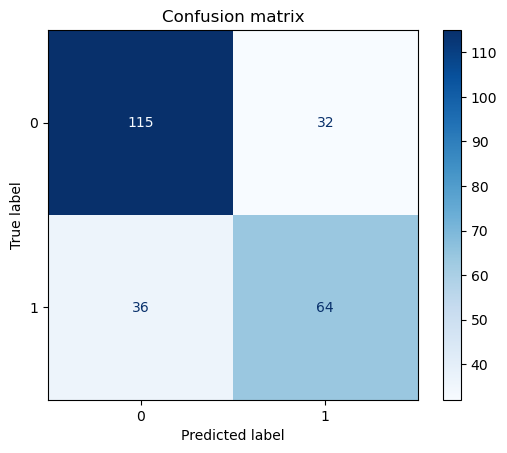

In [300]:
disp = ConfusionMatrixDisplay.from_estimator(
        basemodel,
        X_test,
        y_test,
        # display_labels=model.classes_,
        cmap=plt.cm.Blues
    )
plt.title('Confusion matrix')
plt.show()

In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       147
           1       0.67      0.64      0.65       100

    accuracy                           0.72       247
   macro avg       0.71      0.71      0.71       247
weighted avg       0.72      0.72      0.72       247



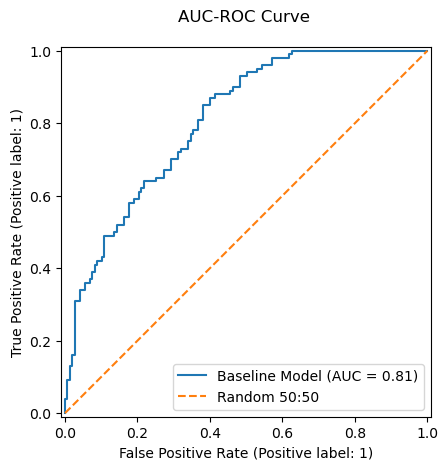

In [267]:
disp = RocCurveDisplay.from_estimator(
            basemodel, 
            X_test, 
            y_test,
            name='Baseline Model')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

In [268]:
basemodel.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', LogisticRegression(class_weight='balanced'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': LogisticRegression(class_weight='balanced'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 1.0,
 'classifier__class_weight': 'balanced',
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'deprecated',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [272]:
tscv = TimeSeriesSplit(n_splits=5, gap=1)

In [273]:
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10]
    }

grid_search = GridSearchCV(
    estimator=basemodel, 
    param_grid=param_grid, 
    scoring='roc_auc',
    n_jobs=-1,
    cv=tscv, 
    verbose=1)

# Fit the Model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=TimeSeriesSplit(gap=1, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1, param_grid={'classifier__C': [0.01, 0.1, 1, 10]},
             scoring='roc_auc', verbose=1)

In [274]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'classifier__C': 0.01}


In [275]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict class labels 
y_pred = best_model.predict(X_test)

# Predict Probabilities
# y_proba = tunedmodel.predict_proba(X_test)[:,1]

# Measure Accuracy
acc_train = accuracy_score(y_train, best_model.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

# Print Accuracy
print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t: {acc_test :0.4}')


 Training Accuracy 	: 0.7632 
 Test Accuracy 		: 0.7045


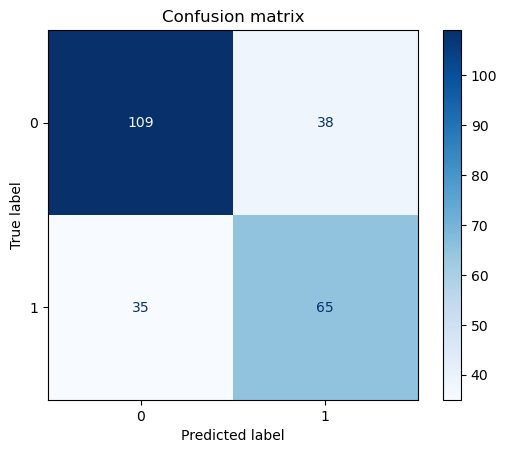

In [276]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        best_model,
        X_test,
        y_test,
        # display_labels=model.classes_,
        cmap=plt.cm.Blues
    )
plt.title('Confusion matrix')
plt.show()

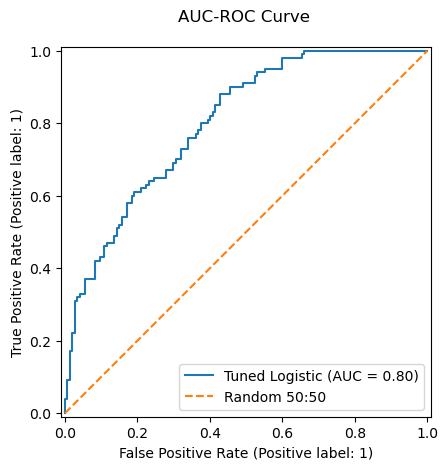

In [277]:
# Display ROCCurve 
disp = RocCurveDisplay.from_estimator(
            best_model, 
            X_test, 
            y_test,
            name='Tuned Logistic')
plt.title("AUC-ROC Curve \n")
plt.plot([0,1],[0,1],linestyle="--", label='Random 50:50')
plt.legend()
plt.show()

In [278]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       147
           1       0.63      0.65      0.64       100

    accuracy                           0.70       247
   macro avg       0.69      0.70      0.69       247
weighted avg       0.71      0.70      0.71       247

